In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://raw.githubusercontent.com/apr69/DS/main/Social_Network_Ads.csv"
df = pd.read_csv(url)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape

((320, 2), (80, 2))

In [13]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Regression Line Tracing')

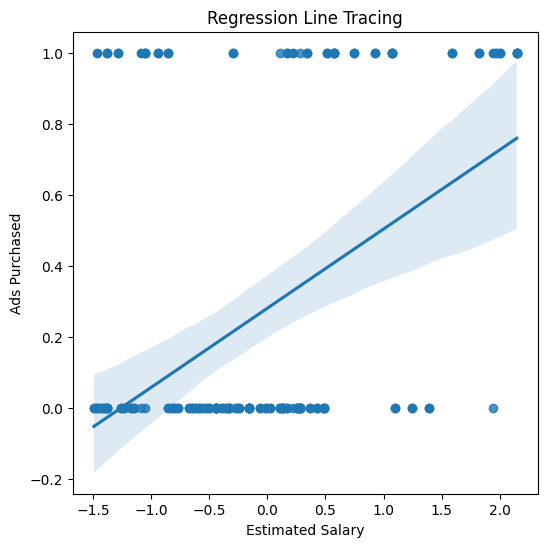

In [19]:
plt.figure(figsize=(6,6))
sns.regplot(x = X_test[:, 1], y =prediction)
plt.scatter(X_test[:, 1], y_test)
plt.xlabel('Estimated Salary')
plt.ylabel('Ads Purchased')
plt.title('Regression Line Tracing')

In [21]:
#  Plotting confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction)
cm

array([[50,  2],
       [ 9, 19]])

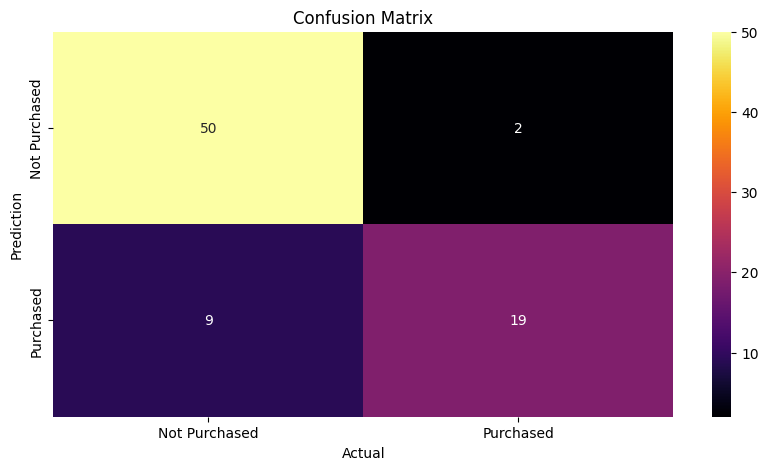

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'], cmap='inferno')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

In [28]:
cr = classification_report(y_test, prediction)
print('Classification report: \n\n', cr)

Classification report: 

               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [32]:
tp, fn, fp, tn = confusion_matrix(y_test, prediction, labels=[0,1]).reshape(-1)
print(f"True Positive: {tp} \nFalse Negative: {fn} \nFalse Positive: {fp} \nTrue Negative: {tn}")

True Positive: 50 
False Negative: 2 
False Positive: 9 
True Negative: 19


In [34]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2/((1/recall)+(1/precision))

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print("F1 score: ", f1_score)

Accuracy:  0.8625
Precision:  0.847457627118644
Recall:  0.9615384615384616
F1 score:  0.9009009009009008
